In [115]:
#Import Packages


import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

import sklearn
from sklearn.model_selection import train_test_split

import re
import string

import nltk
from nltk.corpus import twitter_samples
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

In [116]:
nltk.download('twitter_samples')
nltk.download('stopwords')

[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\kryzw\AppData\Roaming\nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kryzw\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [117]:


def process_tweet(tweet):
  stemmer = PorterStemmer() 
  stopwords_english = stopwords.words('english')

  # remove the stock market tickers
  tweet = re.sub(r'\$\w*', '', tweet)

  # remove the old styles retweet text 'RT'
  tweet = re.sub(r'^RT[\s]+', '', tweet)

  # remove the hyperlinks
  tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)

  # remove the # symbol
  tweet = re.sub(r'#', '', tweet)

  # Tokenize the tweet
  tokenizer = TweetTokenizer(preserve_case=False, reduce_len=True, strip_handles=True)
  tweet_tokens = tokenizer.tokenize(tweet)

  tweet_clean = []

  # removing stopwords and punctuation
  for word in tweet_tokens:
    if (word not in stopwords_english and
        word not in string.punctuation):
      stem_word = stemmer.stem(word)    #stemming
      tweet_clean.append(stem_word)

  return tweet_clean

In [55]:
# https://medium.com/@koshut.takatsuji/twitter-sentiment-analysis-with-full-code-and-explanation-naive-bayes-a380b38f036b
#cleaning data

#Import labelled training data set
df = pd.read_csv('C:/Dev_And_Apps/Twitter_Extract_app/TrainingData/TRAINING3.csv')

#chane pandas options to show full column width
pd.options.display.max_colwidth = 250
#read head of data
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2022 entries, 0 to 2021
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    2022 non-null   object
 1   Target  2022 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 31.7+ KB


<AxesSubplot:title={'center':'Distribution of Tweet Sentiment in Labelled Data'}, xlabel='Sentiment', ylabel='# Tweets'>

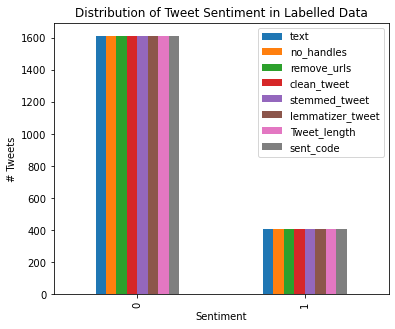

In [118]:
# general analysis of dataset
#DISTRIBUTION OF SENTIMENT
dfg = df.groupby(df['Target']).count()
dfg.plot(kind='bar', title='Distribution of Tweet Sentiment in Labelled Data', ylabel='# Tweets',
         xlabel='Sentiment', figsize=(6, 5))

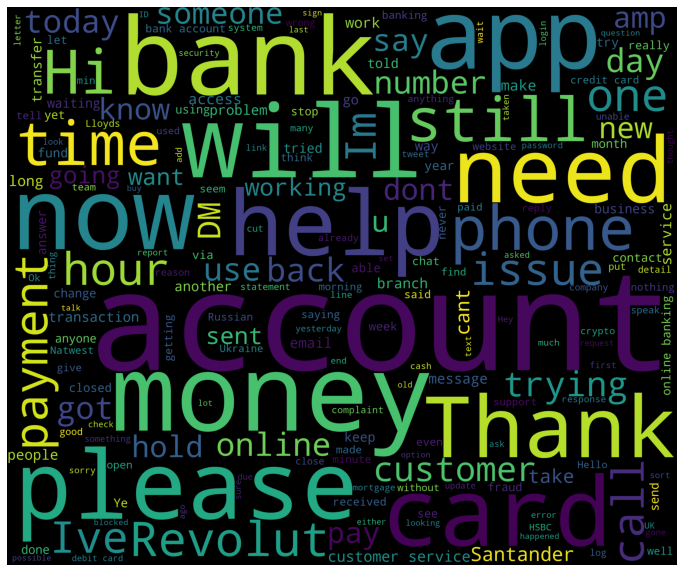

In [119]:
#Word cloud for negatiuve tweets
from wordcloud import WordCloud,STOPWORDS

dfn=df[df['Target']==0]
words = ' '.join(dfn['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

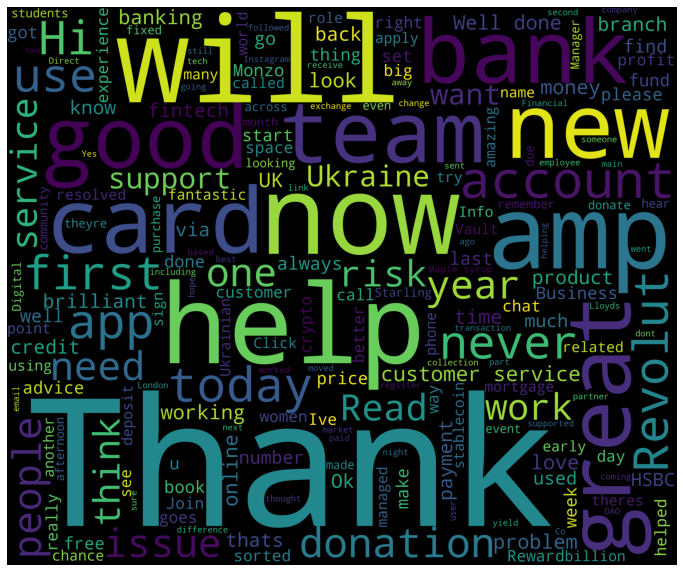

In [120]:
#Word cloud for positive tweets
from wordcloud import WordCloud,STOPWORDS

dfp=df[df['Target']==1]
words = ' '.join(dfp['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [121]:
#General data cleaning

#Remove any rows with a "nan" in them
df = df.dropna(axis=0, how = 'any')

#Make it so that any non readable text gets converted into nothing
def removetext(text):
    return ''.join([i if ord(i) < 128 else '' for i in text])

#Here I am doing the actual removing
df['text'] = df['text'].apply(removetext)

In [122]:
#remove stop words
import re
import nltk
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

#remove @monzo etc
def clean_tweet_handles(raw_tweet):
    handles_only = re.sub(r"()@\w+",r"\1",raw_tweet)
    #print(handles_only)
    words = handles_only.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return( " ".join( meaningful_words )) 

#remove URLS
def remove_urls(raw_tweet):
    tweet = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', raw_tweet,flags=re.MULTILINE)
#     re.sub(r"http\S+|www\S+|https\S+", '', tweet, flags=re.MULTILINE
    #print(handles_only)
    words = tweet.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return( " ".join( meaningful_words )) 

def tweet_to_words(raw_tweet):
    letters_only = re.sub("[^a-zA-Z]", " ",raw_tweet) 
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return( " ".join( meaningful_words )) 

def stemming(raw_tweet):
    letters_only = re.sub("[^a-zA-Z]", " ",raw_tweet) 
    words = letters_only.lower().split()   
    stops = set(stopwords.words("english"))      
    ps = PorterStemmer()
    stemmed_words = [ps.stem(w) for w in words if not w in stops]
    return( " ".join( stemmed_words)) 
    
def lemmatizer(raw_tweet):
    letters_only = re.sub("[^a-zA-Z]", " ",raw_tweet) 
    words = letters_only.lower().split()   
    stops = set(stopwords.words("english"))      
#     ps = PorterStemmer()
#     stemmed_words = [ps.stem(w) for w in words if not w in stops]   
    lemmatizer = WordNetLemmatizer()
    lemma_words = [lemmatizer.lemmatize(w, pos='a') for w in words if not w in stops]
    return( " ".join( lemma_words)) 

#removing links

def clean_tweet_length(raw_tweet):
    letters_only = re.sub("[^a-zA-Z]", " ",raw_tweet) 
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return(len(meaningful_words)) 

df_clean=df
df_clean['no_handles']=df_clean['text'].apply(lambda x: clean_tweet_handles(x))
df_clean['remove_urls']=df_clean['no_handles'].apply(lambda x: remove_urls(x))
df_clean['clean_tweet']=df_clean['remove_urls'].apply(lambda x: tweet_to_words(x))
df_clean['stemmed_tweet']=df_clean['clean_tweet'].apply(lambda x: stemming(x))
df_clean['lemmatizer_tweet']=df_clean['clean_tweet'].apply(lambda x: lemmatizer(x))
df_clean['Tweet_length']=df_clean['text'].apply(lambda x: clean_tweet_length(x))

df_clean.head(10)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kryzw\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,text,Target,no_handles,remove_urls,clean_tweet,stemmed_tweet,lemmatizer_tweet,Tweet_length,sent_code
0,"To all @RevolutApp users, grab your $SHIB now before we go to the moon. Last chance https://t.co/NH5ovmWYrM",1,"users, grab $shib go moon. last chance https://t.co/nh5ovmwyrm","users, grab $shib go moon. last chance",users grab shib go moon last chance,user grab shib go moon last chanc,users grab shib go moon last chance,12,1
1,@GossipShib @RevolutApp @RobinhoodApp ShibArmy Never Sleeps LFG https://t.co/mBZCqtlm9w,1,shibarmy never sleeps lfg https://t.co/mbzcqtlm9w,shibarmy never sleeps lfg,shibarmy never sleeps lfg,shibarmi never sleep lfg,shibarmy never sleeps lfg,11,1
2,@monzo I think Im a bit late to the party https://t.co/Lm6IpxKAnb,0,think im bit late party https://t.co/lm6ipxkanb,think im bit late party,think im bit late party,think im bit late parti,think im bit late party,10,0
3,@GossipShib @RevolutApp Now i can add to my bag so easyyttt @RevolutApp https://t.co/lvTuKdShag,1,add bag easyyttt https://t.co/lvtukdshag,add bag easyyttt,add bag easyyttt,add bag easyyttt,add bag easyyttt,9,1
4,@HSBC_UK This is totally unbelievable two hours forty mins then cut off I need help this so stressful for something thats important. HSBC you have failed pull your finger out!!!! How do I get help from my Bank https://t.co/lJH00WOCQR,0,totally unbelievable two hours forty mins cut need help stressful something thats important. hsbc failed pull finger out!!!! get help bank https://t.co/ljh00wocqr,totally unbelievable two hours forty mins cut need help stressful something thats important. hsbc failed pull finger out!!!! get help bank,totally unbelievable two hours forty mins cut need help stressful something thats important hsbc failed pull finger get help bank,total unbeliev two hour forti min cut need help stress someth that import hsbc fail pull finger get help bank,totally unbelievable two hours forty mins cut need help stressful something thats important hsbc failed pull finger get help bank,26,0
5,@DuncanGray @RevolutApp Did any of the free #SHIB promotions pan out?,0,free #shib promotions pan out?,free #shib promotions pan out?,free shib promotions pan,free shib promot pan,free shib promotions pan,6,0
6,@HSBC_UK HSBC came bottom in a Which survey for accessibility for Disabled people. Being forced to go into the bank and beg for your own money or permission to spend it on something you want is a disgrace. https://t.co/DQuCavVhV8,0,hsbc came bottom survey accessibility disabled people. forced go bank beg money permission spend something want disgrace. https://t.co/dqucavvhv8,hsbc came bottom survey accessibility disabled people. forced go bank beg money permission spend something want disgrace.,hsbc came bottom survey accessibility disabled people forced go bank beg money permission spend something want disgrace,hsbc came bottom survey access disabl peopl forc go bank beg money permiss spend someth want disgrac,hsbc came bottom survey accessibility disabled people forced go bank beg money permission spend something want disgrace,22,0
7,@DavidDo28846484 @monzo No one falls for this shit.,0,one falls shit.,one falls shit.,one falls shit,one fall shit,one falls shit,5,0
8,"@WaqasMunami @shibainuart @RevolutApp There is a lot to burn, it is a very daunting task. NASA didn't sign a few papers and put people on the moon in a year. It took a lot of effort from a lot of different people and a lot of tests. \nIf we had t...",0,"lot burn, daunting task. nasa sign papers put people moon year. took lot effort lot different people lot tests. current capability burn trillions, shib affordable.","lot burn, daunting task. nasa sign papers put people moon year. took lot effort lot different people lot tests. current capability burn trillions, shib affordable.",lot burn daunting task nasa sign papers put people moon year took lot effort lot different people lot tests current capability burn trillions shib affordable,lot burn daunt task nasa sign

In [123]:
#encoding the sentiment and label
# Import LabelEncoder
from sklearn import preprocessing
#creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
df_clean['sent_code']=le.fit_transform(df['Target'])
#df['lab_code']=le.fit_transform(df['label'])
df_clean.head(5)

,text,Target,no_handles,remove_urls,clean_tweet,stemmed_tweet,lemmatizer_tweet,Tweet_length,sent_code
0,"To all @RevolutApp users, grab your $SHIB now before we go to the moon. Last chance https://t.co/NH5ovmWYrM",1,"users, grab $shib go moon. last chance https://t.co/nh5ovmwyrm","users, grab $shib go moon. last chance",users grab shib go moon last chance,user grab shib go moon last chanc,users grab shib go moon last chance,12,1
1,@GossipShib @RevolutApp @RobinhoodApp ShibArmy Never Sleeps LFG https://t.co/mBZCqtlm9w,1,shibarmy never sleeps lfg https://t.co/mbzcqtlm9w,shibarmy never sleeps lfg,shibarmy never sleeps lfg,shibarmi never sleep lfg,shibarmy never sleeps lfg,11,1
2,@monzo I think Im a bit late to the party https://t.co/Lm6IpxKAnb,0,think im bit late party https://t.co/lm6ipxkanb,think im bit late party,think im bit late party,think im bit late parti,think im bit late party,10,0
3,@GossipShib @RevolutApp Now i can add to my bag so easyyttt @RevolutApp https://t.co/lvTuKdShag,1,add bag easyyttt https://t.co/lvtukdshag,add bag easyyttt,add bag easyyttt,add bag easyyttt,add bag easyyttt,9,1
4,@HSBC_UK This is totally unbelievable two hours forty mins then cut off I need help this so stressful for something thats important. HSBC you have failed pull your finger out!!!! How do I get help from my Bank https://t.co/lJH00WOCQR,0,totally unbelievable two hours forty mins cut need help stressful something thats important. hsbc failed pull finger out!!!! get help bank https://t.co/ljh00wocqr,totally unbelievable two hours forty mins cut need help stressful something thats important. hsbc failed pull finger out!!!! get help bank,totally unbelievable two hours forty mins cut need help stressful something thats important hsbc failed pull finger get help bank,total unbeliev two hour forti min cut need help stress someth that import hsbc fail pull finger get help bank,totally unbelievable two hours forty mins cut need help stressful something thats important hsbc failed pull finger get help bank,26,0


In [71]:
#stemmed _tweet model
train,test = train_test_split(df_clean,test_size=0.3,random_state=42)
train_clean_tweet=[]
for tweet in train['lemmatizer_tweet']:
    train_clean_tweet.append(tweet)
test_clean_tweet=[]
for tweet in test['lemmatizer_tweet']:
    test_clean_tweet.append(tweet)
    
test_clean_tweet[0:10]

['walk bank business customer find cant get change business go local instead whats point banking might well open account',
 'yes could middle name added never card changed type asks name card payments',
 'example link email doesnt work id proof',
 'home insurance contact number cuts every time try call problem',
 'founded gazprom money owned russian state means russian state shares etc revolut',
 'able',
 'santander operate online one answers phone',
 'nope neither load',
 'someone paid bank th feb looking',
 'another copy paste reply ill canceling credits account using high street bank seems constant problems']

In [124]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer(analyzer = "word")
train_features= v.fit_transform(train_clean_tweet)
test_features=v.transform(test_clean_tweet)




In [125]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

In [126]:
Classifiers = [
    LogisticRegression(C=0.000000001,solver='liblinear',max_iter=400),
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=500),
    AdaBoostClassifier(),
    GaussianNB()]

Accuracy of LogisticRegressionis 0.7
[[35  4]
 [20 21]]
0.84 0.5121951219512195 0.6363636363636365
Accuracy of KNeighborsClassifieris 0.575
[[30  9]
 [25 16]]
0.64 0.3902439024390244 0.48484848484848486
Accuracy of SVCis 0.4875
[[39  0]
 [41  0]]
0.0 0.0 0.0
Accuracy of DecisionTreeClassifieris 0.6375
[[28 11]
 [18 23]]
0.6764705882352942 0.5609756097560976 0.6133333333333334


C:\Users\kryzw\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy of RandomForestClassifieris 0.675
[[30  9]
 [17 24]]
0.7272727272727273 0.5853658536585366 0.6486486486486487
Accuracy of AdaBoostClassifieris 0.7375
[[27 12]
 [ 9 32]]
0.7272727272727273 0.7804878048780488 0.7529411764705882
Accuracy of GaussianNBis 0.65
[[31  8]
 [20 21]]
0.7241379310344828 0.5121951219512195 0.6000000000000001


Text(0.5, 1.0, 'Accuracies of Models')

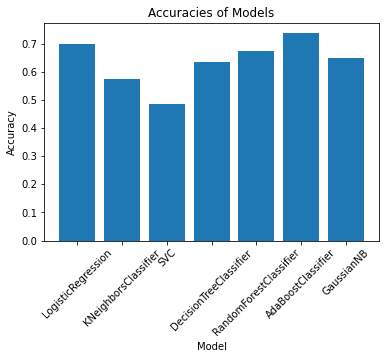

In [127]:
dense_features=train_features.toarray()
dense_test= test_features.toarray()
Accuracy=[]
Model=[]
for classifier in Classifiers:
    try:
        fit = classifier.fit(train_features,train['sent_code'])
        pred = fit.predict(test_features)
    except Exception:
        fit = classifier.fit(dense_features,train['sent_code'])
        pred = fit.predict(dense_test)
    accuracy = accuracy_score(pred,test['sent_code'])
    Accuracy.append(accuracy)
    Model.append(classifier.__class__.__name__)
    print('Accuracy of '+classifier.__class__.__name__+'is '+str(accuracy))    
    cf_matrix = confusion_matrix(test['sent_code'],pred)
    print(cf_matrix)
    precision = precision_score(test['sent_code'],pred)
    recall  =  recall_score(test['sent_code'],pred)
    f1 = f1_score(test['sent_code'],pred)
    print(precision,recall,f1)
    
Index = [1,2,3,4,5,6,7]
plt.bar(Index,Accuracy)
plt.xticks(Index, Model,rotation=45)
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.title('Accuracies of Models')

['found revolut card last night destroy send back way instructions card thanks', 'digital banks like becoming popular customers choose manage money via app pros cons smallbusinessowners', 'customer service assistant based erdington click apply bankingjobs retailjobs brumjobs', 'metrobank pretty reliable good customer service phone', 'crao token cryptomining nodes rewards income crao token best investment presale date th february pm utc tg twitter bsc bscgem bnb p e craotoken']
Accuracy of LogisticRegressionis 0.7
[[35  4]
 [20 21]]
0.84 0.5121951219512195 0.6363636363636365
Accuracy of KNeighborsClassifieris 0.575
[[30  9]
 [25 16]]
0.64 0.3902439024390244 0.48484848484848486
Accuracy of SVCis 0.4875
[[39  0]
 [41  0]]
0.0 0.0 0.0
Accuracy of DecisionTreeClassifieris 0.6
[[27 12]
 [20 21]]
0.6363636363636364 0.5121951219512195 0.5675675675675675


C:\Users\kryzw\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy of RandomForestClassifieris 0.7
[[32  7]
 [17 24]]
0.7741935483870968 0.5853658536585366 0.6666666666666666
Accuracy of AdaBoostClassifieris 0.7375
[[27 12]
 [ 9 32]]
0.7272727272727273 0.7804878048780488 0.7529411764705882
Accuracy of GaussianNBis 0.65
[[31  8]
 [20 21]]
0.7241379310344828 0.5121951219512195 0.6000000000000001


Text(0.5, 1.0, 'Accuracies of Models')

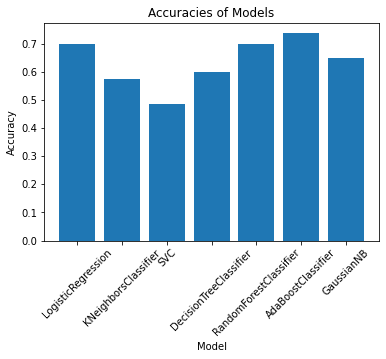

In [143]:
#try and force the sample
data_pos = df_clean[df_clean['sent_code']==1]
data_neg = df_clean[df_clean['sent_code']==0]
data_pos = data_pos.iloc[:int(400)]
data_neg = data_neg.iloc[:int(400)]
force_sample = pd.concat([data_pos, data_neg])

#stemmed _tweet model
train,test = train_test_split(force_sample,test_size=0.1,random_state=42)
train_clean_tweet=[]
for tweet in train['lemmatizer_tweet']:
    train_clean_tweet.append(tweet)
print(train_clean_tweet[0:5])
test_clean_tweet=[]
for tweet in test['lemmatizer_tweet']:
    test_clean_tweet.append(tweet)
    
v = CountVectorizer(analyzer = "word")
train_features= v.fit_transform(train_clean_tweet)
test_features=v.transform(test_clean_tweet)

dense_features=train_features.toarray()
dense_test= test_features.toarray()
Accuracy=[]
Model=[]
for classifier in Classifiers:
    try:
        fit = classifier.fit(train_features,train['sent_code'])
        pred = fit.predict(test_features)
    except Exception:
        fit = classifier.fit(dense_features,train['sent_code'])
        pred = fit.predict(dense_test)
    accuracy = accuracy_score(pred,test['sent_code'])
    Accuracy.append(accuracy)
    Model.append(classifier.__class__.__name__)
    print('Accuracy of '+classifier.__class__.__name__+'is '+str(accuracy))    
    cf_matrix = confusion_matrix(test['sent_code'],pred)
    print(cf_matrix)
    precision = precision_score(test['sent_code'],pred)
    recall  =  recall_score(test['sent_code'],pred)
    f1 = f1_score(test['sent_code'],pred)
    print(precision,recall,f1)
    
Index = [1,2,3,4,5,6,7]
plt.bar(Index,Accuracy)
plt.xticks(Index, Model,rotation=45)
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.title('Accuracies of Models')

In [194]:
#Fit the best model to data frame
#try and force the sample
data_pos = df_clean[df_clean['sent_code']==1]
data_neg = df_clean[df_clean['sent_code']==0]
data_pos = data_pos.iloc[:int(400)]
data_neg = data_neg.iloc[:int(400)]
force_sample = pd.concat([data_pos, data_neg])

#print(force_sample.head(1))
#stemmed _tweet model

train,test = train_test_split(force_sample,test_size=0.1,random_state=42)
train_clean_tweet=[]
for tweet in train['lemmatizer_tweet']:
    train_clean_tweet.append(tweet)
    
#print(train_clean_tweet[:1])

test_clean_tweet=[]
for tweet in test['lemmatizer_tweet']:
    test_clean_tweet.append(tweet)
    
v = CountVectorizer(analyzer = "word")
train_features= v.fit_transform(train_clean_tweet)
# print(train_features[0:2])

test_features=v.transform(test_clean_tweet)
# print(test_features[0:2])


clf = AdaBoostClassifier(random_state=0)
print(clf)
fit = clf.fit(train_features,train['sent_code'])
print(fit)
pred = fit.predict(test_features)
print(pred)
# accuracy = accuracy_score(pred,test['sent_code'])
# print(accuracy)
# recall  =  recall_score(test['sent_code'],pred)
# f1 = f1_score(test['sent_code'],pred)
# print(precision,recall,f1)

test['pred_sent'] = pred
test.head(1)

AdaBoostClassifier(random_state=0)
AdaBoostClassifier(random_state=0)
[0 0 1 1 1 0 1 0 0 1 1 0 0 0 0 1 0 1 0 0 0 1 1 0 1 1 1 1 0 0 1 0 0 1 1 1 0
 1 1 0 0 1 1 1 0 0 0 0 1 1 0 1 0 0 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 0 0 1 0 1
 1 1 1 0 1 0]


C:\Users\kryzw\AppData\Local\Temp/ipykernel_34148/929470151.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['pred_sent'] = pred


,text,Target,no_handles,remove_urls,clean_tweet,stemmed_tweet,lemmatizer_tweet,Tweet_length,sent_code,pred_sent
388,Then its the old bad customer service routine of deflection blaming the bank @HalifaxBank who after a 40 minutes call are just as bad with the deflection tactics of blaming @AsdaServiceTeam @asda https://t.co/wMaraDQPkH,0,old bad customer service routine deflection blaming bank 40 minutes call bad deflection tactics blaming https://t.co/wmaradqpkh,old bad customer service routine deflection blaming bank 40 minutes call bad deflection tactics blaming,old bad customer service routine deflection blaming bank minutes call bad deflection tactics blaming,old bad custom servic routin deflect blame bank minut call bad deflect tactic blame,old bad customer service routine deflection blaming bank minutes call bad deflection tactics blaming,20,0,0


In [217]:
#from sklearn.feature_extraction.text import CountVectorizer
# v = CountVectorizer(analyzer = "word")
# train_features= v.fit_transform(train_clean_tweet)
# test_features=v.transform(test_clean_tweet)

#stemmed _tweet model


test_clean_tweet=[]
for tweet in df_clean['lemmatizer_tweet']:
    test_clean_tweet.append(tweet)
    
print(test_clean_tweet[0:2])

print(v)

new_features=v.transform(test_clean_tweet)
print(new_features[0:1])

#words = v.fit_transform(new_features).toarray()

predict = clf.predict(new_features)
df_clean['sent_predict']=predict
df_clean.head(5)

['users grab shib go moon last chance', 'shibarmy never sleeps lfg']
CountVectorizer()
  (0, 402)	1
  (0, 1019)	1
  (0, 1035)	1
  (0, 1315)	1
  (0, 1527)	1
  (0, 2123)	1
  (0, 2530)	1


,text,Target,no_handles,remove_urls,clean_tweet,stemmed_tweet,lemmatizer_tweet,Tweet_length,sent_code,sent_predict
0,"To all @RevolutApp users, grab your $SHIB now before we go to the moon. Last chance https://t.co/NH5ovmWYrM",1,"users, grab $shib go moon. last chance https://t.co/nh5ovmwyrm","users, grab $shib go moon. last chance",users grab shib go moon last chance,user grab shib go moon last chanc,users grab shib go moon last chance,12,1,1
1,@GossipShib @RevolutApp @RobinhoodApp ShibArmy Never Sleeps LFG https://t.co/mBZCqtlm9w,1,shibarmy never sleeps lfg https://t.co/mbzcqtlm9w,shibarmy never sleeps lfg,shibarmy never sleeps lfg,shibarmi never sleep lfg,shibarmy never sleeps lfg,11,1,1
2,@monzo I think Im a bit late to the party https://t.co/Lm6IpxKAnb,0,think im bit late party https://t.co/lm6ipxkanb,think im bit late party,think im bit late party,think im bit late parti,think im bit late party,10,0,0
3,@GossipShib @RevolutApp Now i can add to my bag so easyyttt @RevolutApp https://t.co/lvTuKdShag,1,add bag easyyttt https://t.co/lvtukdshag,add bag easyyttt,add bag easyyttt,add bag easyyttt,add bag easyyttt,9,1,1
4,@HSBC_UK This is totally unbelievable two hours forty mins then cut off I need help this so stressful for something thats important. HSBC you have failed pull your finger out!!!! How do I get help from my Bank https://t.co/lJH00WOCQR,0,totally unbelievable two hours forty mins cut need help stressful something thats important. hsbc failed pull finger out!!!! get help bank https://t.co/ljh00wocqr,totally unbelievable two hours forty mins cut need help stressful something thats important. hsbc failed pull finger out!!!! get help bank,totally unbelievable two hours forty mins cut need help stressful something thats important hsbc failed pull finger get help bank,total unbeliev two hour forti min cut need help stress someth that import hsbc fail pull finger get help bank,totally unbelievable two hours forty mins cut need help stressful something thats important hsbc failed pull finger get help bank,26,0,0


In [216]:
from joblib import dump, load
dump(clf, 'C:/Dev_And_Apps/Twitter_Extract_app/Trained_Models/sent_Model.joblib') 
dump(v, "C:/Dev_And_Apps/Twitter_Extract_app/Trained_Models/sentvectorizer.joblib")

['C:/Dev_And_Apps/Twitter_Extract_app/Trained_Models/sentvectorizer.joblib']

In [220]:
df_clean['@RevolutApp|@monzo|@HSBC_UK'] = df_clean['text'].str.findall('@RevolutApp|@monzo|@HSBC_UK', flags=re.IGNORECASE)
df_clean.head()

,text,Target,no_handles,remove_urls,clean_tweet,stemmed_tweet,lemmatizer_tweet,Tweet_length,sent_code,sent_predict,@RevolutApp|@monzo|@HSBC_UK
0,"To all @RevolutApp users, grab your $SHIB now before we go to the moon. Last chance https://t.co/NH5ovmWYrM",1,"users, grab $shib go moon. last chance https://t.co/nh5ovmwyrm","users, grab $shib go moon. last chance",users grab shib go moon last chance,user grab shib go moon last chanc,users grab shib go moon last chance,12,1,1,[@RevolutApp]
1,@GossipShib @RevolutApp @RobinhoodApp ShibArmy Never Sleeps LFG https://t.co/mBZCqtlm9w,1,shibarmy never sleeps lfg https://t.co/mbzcqtlm9w,shibarmy never sleeps lfg,shibarmy never sleeps lfg,shibarmi never sleep lfg,shibarmy never sleeps lfg,11,1,1,[@RevolutApp]
2,@monzo I think Im a bit late to the party https://t.co/Lm6IpxKAnb,0,think im bit late party https://t.co/lm6ipxkanb,think im bit late party,think im bit late party,think im bit late parti,think im bit late party,10,0,0,[@monzo]
3,@GossipShib @RevolutApp Now i can add to my bag so easyyttt @RevolutApp https://t.co/lvTuKdShag,1,add bag easyyttt https://t.co/lvtukdshag,add bag easyyttt,add bag easyyttt,add bag easyyttt,add bag easyyttt,9,1,1,"[@RevolutApp, @RevolutApp]"
4,@HSBC_UK This is totally unbelievable two hours forty mins then cut off I need help this so stressful for something thats important. HSBC you have failed pull your finger out!!!! How do I get help from my Bank https://t.co/lJH00WOCQR,0,totally unbelievable two hours forty mins cut need help stressful something thats important. hsbc failed pull finger out!!!! get help bank https://t.co/ljh00wocqr,totally unbelievable two hours forty mins cut need help stressful something thats important. hsbc failed pull finger out!!!! get help bank,totally unbelievable two hours forty mins cut need help stressful something thats important hsbc failed pull finger get help bank,total unbeliev two hour forti min cut need help stress someth that import hsbc fail pull finger get help bank,totally unbelievable two hours forty mins cut need help stressful something thats important hsbc failed pull finger get help bank,26,0,0,[@HSBC_UK]


[[27 12]
 [ 9 32]]
0.7272727272727273 0.7804878048780488 0.7529411764705882


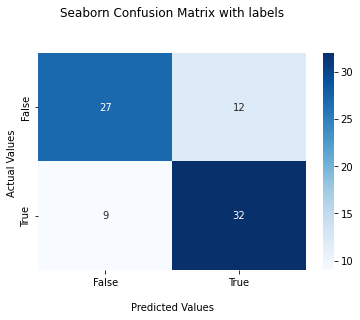

In [112]:
#print(train,test)

#confuision matrix
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(test['sent_code'],pred)

print(cf_matrix)
precision = precision_score(test['sent_code'],pred)
recall  =  recall_score(test['sent_code'],pred)
f1 = f1_score(test['sent_code'],pred)
print(precision,recall,f1)

import seaborn as sns

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [113]:
test['sent_accuracy'] = np.where(test['sent_code']== test['pred_sent'], 1, 0)
df2 = test.groupby('sent_code').agg({'sent_code':['count'], 
                         'sent_accuracy':['sum']}).reset_index()

df2.columns = ['_'.join(col) for col in df2.columns.values]
df2 = df2.reset_index()
df2['accuracy']=df2['sent_accuracy_sum']/df2['sent_code_count']
df2

C:\Users\kryzw\AppData\Local\Temp/ipykernel_34148/1650602817.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['sent_accuracy'] = np.where(test['sent_code']== test['pred_sent'], 1, 0)


,index,sent_code_,sent_code_count,sent_accuracy_sum,accuracy
0,0,0,39,27,0.692308
1,1,1,41,32,0.780488


<AxesSubplot:>

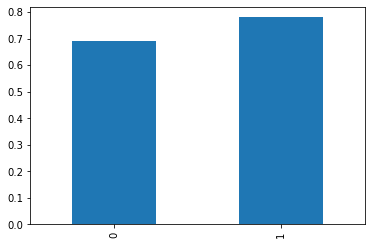

In [114]:
df2['accuracy'].plot(kind="bar")

In [ ]:
dense_features=train_features.toarray()
dense_test= test_features.toarray()
Accuracy=[]
Model=[]
for classifier in Classifiers:
    try:
        fit = classifier.fit(train_features,train['lab_code'])
        pred = fit.predict(test_features)
    except Exception:
        fit = classifier.fit(dense_features,train['lab_code'])
        pred = fit.predict(dense_test)
    accuracy = accuracy_score(pred,test['lab_code'])
    Accuracy.append(accuracy)
    Model.append(classifier.__class__.__name__)
    print('Accuracy of '+classifier.__class__.__name__+'is '+str(accuracy))    
    
Index = [1,2,3,4,5,6,7]
plt.bar(Index,Accuracy)
plt.xticks(Index, Model,rotation=45)
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.title('Accuracies of Models')

#Fit the best model to data frame

dense_features=train_features.toarray()
dense_test= test_features.toarray()
clf = RandomForestClassifier()
fit = clf.fit(train_features,train['lab_code'])
pred = fit.predict(test_features)
accuracy = accuracy_score(pred,test['lab_code'])
print(accuracy)

test['lab_sent'] = pred
test.head(40)

test['sent_accuracy'] = np.where(test['sent_code']== test['pred_sent'], 1, 0)
test['label_accuracy'] = np.where(test['lab_code']== test['lab_sent'], 1, 0)

df3 = test.groupby('label').agg({'label':['count'], 
                         'label_accuracy':['sum']}).reset_index()

df3.columns = ['_'.join(col) for col in df3.columns.values]
df3 = df3.reset_index()
df3['accuracy']=df3['label_accuracy_sum']/df3['label_count']
df3

#df3['accuracy'].plot(x='label',kind="bar")


In [ ]:
#build a new model on twitter sentiment dataset
DATASET_ENCODING = "ISO-8859-1"
DATASET_COLUMNS = ["target", "ids", "date", "flag", "user", "text"]
TRAIN_SIZE = 0.8

dft = pd.read_csv('C:/Dev_And_Apps/Twitter sentiment training dataset/archive/training.1600000.processed.noemoticon.csv', names=DATASET_COLUMNS,encoding =DATASET_ENCODING )
print(len(dft))
dft=dft.sample(frac=0.1)
print(len(dft))
# "C:/Dev_And_Apps/Twitter sentiment training dataset/archive/training.1600000.processed.noemoticon.csv"

In [ ]:
#Remove any rows with a "nan" in them
dft = dft.dropna(axis=0, how = 'any')

#Make it so that any non readable text gets converted into nothing
def removetext(text):
    return ''.join([i if ord(i) < 128 else '' for i in text])

#Here I am doing the actual removing
dft['text'] = dft['text'].apply(removetext)

In [ ]:
# Import LabelEncoder
from sklearn import preprocessing
#creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
dft['sent_code']=le.fit_transform(df['target'])

df.head(5)

In [ ]:
#remove stop words
import re
import nltk
from nltk.corpus import stopwords

def tweet_to_words(raw_tweet):
    letters_only = re.sub("[^a-zA-Z]", " ",raw_tweet) 
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return( " ".join( meaningful_words )) 

def clean_tweet_length(raw_tweet):
    letters_only = re.sub("[^a-zA-Z]", " ",raw_tweet) 
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return(len(meaningful_words)) 

#remove @monzo etc
def clean_tweet_handles(raw_tweet):
    handles_only = re.sub(r"()@\w+",r"\1",raw_tweet)
    #print(handles_only)
    words = handles_only.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return( " ".join( meaningful_words )) 

dft['no_handles']=dft['text'].apply(lambda x: clean_tweet_handles(x))
dft['clean_tweet']=dft['no_handles'].apply(lambda x: tweet_to_words(x))
dft['Tweet_length']=dft['text'].apply(lambda x: clean_tweet_length(x))

dft.head()

In [ ]:
dft['sent_code']=le.fit_transform(dft['target'])

In [ ]:
train,test = train_test_split(dft,test_size=0.5,random_state=42)
train_clean_tweet=[]
for tweet in train['clean_tweet']:
    train_clean_tweet.append(tweet)
test_clean_tweet=[]
for tweet in test['clean_tweet']:
    test_clean_tweet.append(tweet)
    
test_clean_tweet[0:10]

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer(analyzer = "word")
train_features= v.fit_transform(train_clean_tweet)
test_features=v.transform(test_clean_tweet)


In [ ]:
Classifiers = [
    LogisticRegression(C=0.000000001,solver='liblinear',max_iter=400),
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=500),
    AdaBoostClassifier(),
    GaussianNB()]

In [ ]:
dense_features=train_features.toarray()
dense_test= test_features.toarray()
Accuracy=[]
Model=[]
for classifier in Classifiers:
    try:
        fit = classifier.fit(train_features,train['sent_code'])
        pred = fit.predict(test_features)
    except Exception:
        fit = classifier.fit(dense_features,train['sent_code'])
        pred = fit.predict(dense_test)
    accuracy = accuracy_score(pred,test['sent_code'])
    Accuracy.append(accuracy)
    Model.append(classifier.__class__.__name__)
    print('Accuracy of '+classifier.__class__.__name__+'is '+str(accuracy))    
    
Index = [1,2,3,4,5,6,7]
plt.bar(Index,Accuracy)
plt.xticks(Index, Model,rotation=45)
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.title('Accuracies of Models')